In [7]:
include("d:/SI/SAIS_demo.jl")
mat = matopen("d:/SI/library2d.mat")
reference2d = read(mat, "dict")
close(mat)
mat = matopen("d:/SI/library3d.mat")
reference3d = read(mat, "dict")
close(mat)

  Activating project at `d:\julialy`


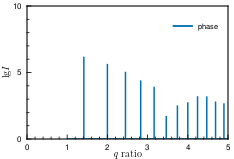

In [16]:
# Scattering patterns in the Figures.
output = FFT_new("d:/SI/tests/BCC.mat", [1.0,0.0,0.0]) #replace this path with the .mat file you need
function myplot()
    fig = Figure(figure_padding=(2, 6, 1, 6))
    t = "text"
    #ax = Axis(fig, xlabel=L"q\;(R_g^{-1})", ylabel=L"log10[Intensity] $$",limits=(0.0,0.30,0.0,10.0),xticks = 0:0.1:10.0,yticks = 0:1.0:10.0)
    #s1 = stem!(ax, Float32.(output[:,1]), Float32.(log10.(output[:,2])),markersize=0,stemwidth=1.5)
    #s1 = stem!(ax, Float32.(q_new), Float32.(log10.(i_new)),markersize=0,stemwidth=1.5)

    ax = Axis(fig, xlabel=L"$q$ ratio", ylabel=L"lg$I$",limits=(0.0,5.0,0.0,10.0),xticks = 0.0:1:10)
    s1 = stem!(ax, Float32.(output[:,1]/output[1,1]), Float32.(log10.(output[:,2])),markersize=0,stemwidth=1.5)
    axislegend(ax, [[s1]], ["phase"], nbanks=3, position=:rt, padding=(0,0,0,0))
    fig[1,1] = ax
    fig
end
fig = CairoMakie.with_theme(myplot, theme_acs(colors=MakiePublication.COLORS[4]))

In [8]:
# Example1:Cubic, Figure 4
for key in ["LAM", "LAMs", "SC", "BCC", "FCC", "GYR", "A15", "SPC", "SG", "DD", "PL"]
    stage1_output = stage1("d:/SI/tests/$key.mat", reference3d; system=Cubic())[1]
    stage2_output = stage2("d:/SI/tests/$key.mat", reference3d; system=Cubic())[1]
    N = stage1_output[2]
    residual = stage2_output[2]
    if stage1_output[1] == key && stage2_output[1] == key && stage1_output[2] == 10 
        println("$key: test passed, N=$N(stage1), residual = $residual(stage2)")
    end
end

LAM: test passed, N=10(stage1), residual = 0.0(stage2)


LAMs: test passed, N=10(stage1), residual = 0.0(stage2)

SC: test passed, N=10(stage1), residual = 0.0(stage2)
BCC: test passed, N=10(stage1), residual = 0.0(stage2)


FCC: test passed, N=10(stage1), residual = 0.0(stage2)


GYR: test passed, N=10(stage1), residual = 0.0(stage2)


A15: test passed, N=10(stage1), residual = 0.0(stage2)


SPC: test passed, N=10(stage1), residual = 0.0(stage2)


SG: test passed, N=10(stage1), residual = 0.0(stage2)


DD: test passed, N=10(stage1), residual = 0.0(stage2)
PL: test passed, N=10(stage1), residual = 0.0(stage2)


In [9]:
# Example2:Orthorhombic
for key in ["SPC", "O70", "HCP_orthogonal"]
    stage1_output = stage1("d:/SI/tests/$key.mat", reference3d; system=Orthorhombic())[1]
    stage2_output = stage2("d:/SI/tests/$key.mat", reference3d; system=Orthorhombic())[1]
    N = stage1_output[2]
    residual = stage2_output[2]
    if stage1_output[1] == key && stage2_output[1] == key && stage1_output[2] == 10 
        println("$key: test passed, N=$N(stage1), residual = $residual(stage2)")
    end
end

SPC: test passed, N=10(stage1), residual = 0.0(stage2)
O70: test passed, N=10(stage1), residual = 0.0(stage2)


HCP_orthogonal: test passed, N=10(stage1), residual = 0.0(stage2)


In [10]:
# Example3:HEX(2D)
for key in ["HEX"]
    stage1_output = stage1("d:/SI/tests/$key.mat", reference2d; system=Hexagonal2D())[1]
    stage2_output = stage2("d:/SI/tests/$key.mat", reference2d; system=Hexagonal2D())[1]
    N = stage1_output[2]
    residual = stage2_output[2]
    if stage1_output[1] == key && stage2_output[1] == key && stage1_output[2] == 10 
        println("$key: test passed, N=$N(stage1), residual = $residual(stage2)")
    end
end

HEX: test passed, N=10(stage1), residual = 0.0(stage2)


In [11]:
# Example4:multi-species, Figure 5
# The variance of the structural species is significantly higher than that of the background species.
println(modified_variance.(read_structure_detail("d:/SI/tests/SC_0.12_ABC_A.mat")[1]))
println(modified_variance.(read_structure_detail("d:/SI/tests/SC_0.15_ABC_C.mat")[1]))
println(modified_variance.(read_structure_detail("d:/SI/tests/CsCl_ABC_[0.11,0.75,0.14]_50.mat")[1]))
println(modified_variance.(read_structure_detail("d:/SI/tests/FCCa_ABC_[0.11,0.82,0.07]_55.mat")[1]))
println(modified_variance.(read_structure_detail("d:/SI/tests/FCCc_ABC_[0.07,0.82,0.11]_55.mat")[1]))
println(modified_variance.(read_structure_detail("d:/SI/tests/NaCl_ABC_[0.11,0.78,0.11]_55.mat")[1]))

[14.89575916974882, 0.004896102019133154, 0.0380638117100274]
[0.13499489105811283,

 0.019318857919337462, 13.871397311296366]
[14.518997125864054, 0.04792317376563919, 12.434531211565744]
[22.391176249447287, 0.007313926801159964, 0.049293110766679235]
[0.04929311076667923, 0.007313926801159956, 22.39117624944722]
[20.76636324762238, 0.03298919357833111, 20.766363208376863]


In [12]:
# Example5:varying a/c ratio
for key in ["Sigma_[1.8,1.8,1.0]", "Sigma_[1.9,1.9,1.0]", "Sigma_[2.0,2.0,1.0]"]
    stage1_output = stage1("d:/SI/tests/$key.mat", reference3d; system=Tetragonal())[1]
    stage2_output = stage2("d:/SI/tests/$key.mat", reference3d; system=Tetragonal())[1]
    N = stage1_output[2]
    residual = stage2_output[2]
    if stage1_output[1] == "Sigma" && stage2_output[1] == "Sigma" && stage1_output[2] == 10 
        println("$key: test passed, N=$N(stage1), residual = $residual(stage2)")
    end
end

Sigma_[1.8,1.8,1.0]: test passed, N=10(stage1), residual = 0.0(stage2)


Sigma_[1.9,1.9,1.0]: test passed, N=10(stage1), residual = 0.0(stage2)


Sigma_[2.0,2.0,1.0]: test passed, N=10(stage1), residual = 0.0(stage2)
